In [23]:
# Importing Libraries & Data Load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path ="Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   13495-ANA    Male   70     Yes     Anambra                    5   
1   13500-ANA    Male   51      No     Anambra                    9   
2   13510-IMO    Male   63     Yes         Imo                    0   
3   13539-AKW  Female   38     Yes  Akwa-Ibrom                    5   
4   13542-JIG    Male   71     Yes      Jigawa                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 4     Deal 4           Yes             No  ...   
1                18        NaN            No             No  ...   
2                28        NaN            No             No  ...   
3                24        NaN           Yes             No  ...   
4                20        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      78.550003   1422.650024           0.0   
1      Credit Card      56.400002 

In [24]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


# List of columns to be label encoded
columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
                    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
                    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
                    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
                    'Payment_Method']


# Encode categorical variables except the target variable
label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1}) 


# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[800  57]
 [127 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       857
           1       0.79      0.63      0.70       345

    accuracy                           0.85      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



C:\Users\mayow\AppData\Local\Temp\ipykernel_43780\1673353027.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors)


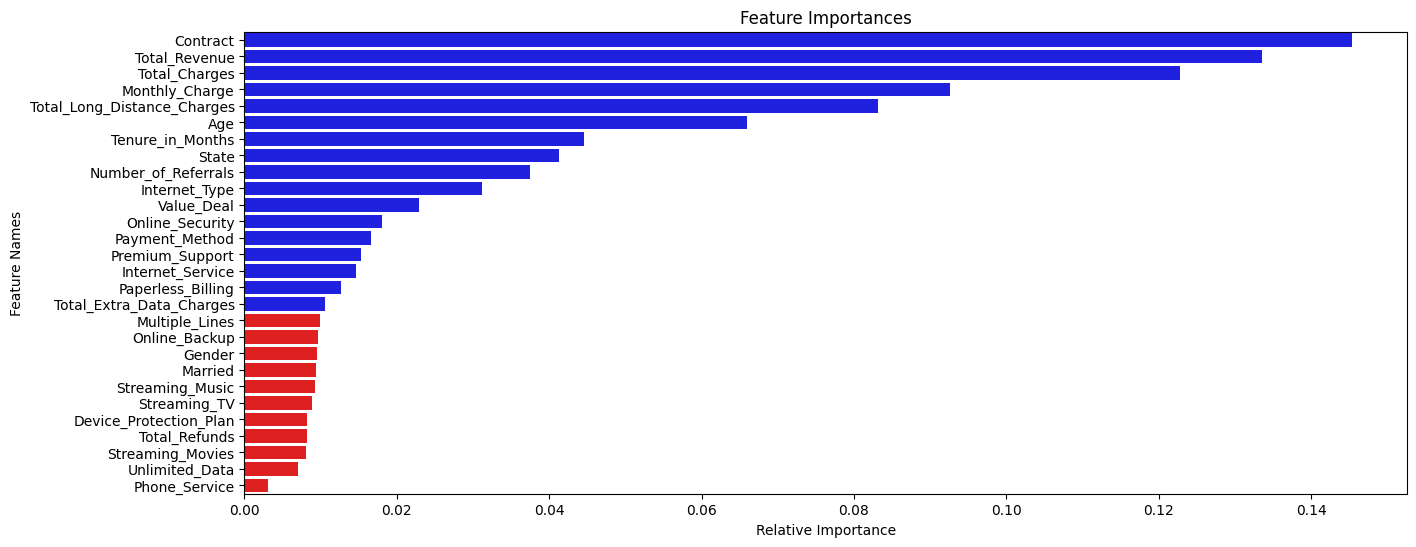

In [26]:
# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

 
# Determine colors: red for <= 0.01, blue otherwise
colors = ['red' if importance <= 0.01 else 'blue' for importance in importances[indices]]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [27]:
# Fine Tunning (We want to remove columns that importance are less than 0.01)

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Multiple_Lines','Online_Backup',
                  'Gender','Married','Streaming_Music', 'Streaming_TV','Device_Protection_Plan',
                  'Total_Refunds','Streaming_Movies','Unlimited_Data','Phone_Service'], axis=1)


# List of columns to be label encoded
columns_to_encode = ['State', 'Value_Deal','Internet_Service', 'Internet_Type', 'Online_Security','Premium_Support','Contract','Paperless_Billing','Payment_Method']


# Encode categorical variables except the target variable
fine_tuned_label_encoders = {}

for column in columns_to_encode:
    fine_tuned_label_encoders[column] = LabelEncoder()
    data[column] = fine_tuned_label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1}) 


# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train Random Forest Model
# Initialize new Random Forest Classifier
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[800  57]
 [124 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       857
           1       0.79      0.64      0.71       345

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.85      0.85      0.84      1202



C:\Users\mayow\AppData\Local\Temp\ipykernel_43780\2551803273.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors)
C:\Users\mayow\AppData\Local\Temp\ipykernel_43780\2551803273.py:18: UserWarning: The palette list has more values (28) than needed (17), which may not be intended.
  sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors)


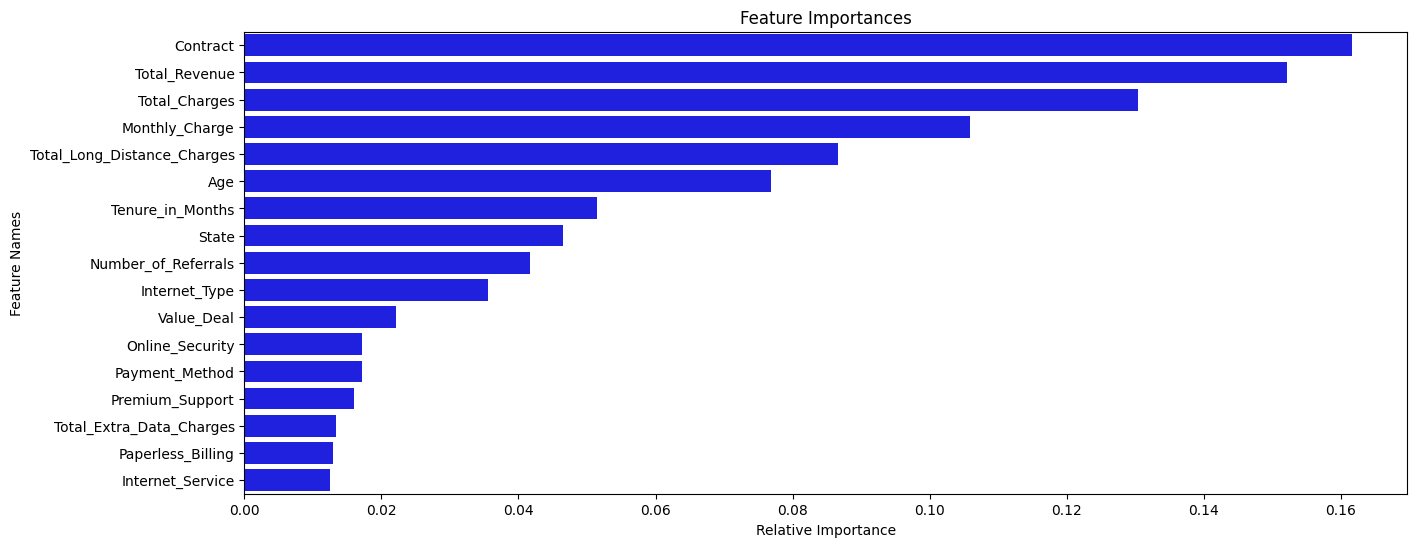

In [29]:
# Evaluate Model
# Make predictions
y_pred2 = rf_model2.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

# Feature Selection using Feature Importance
importances = rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette=colors)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [30]:
# Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
file_path = "Prediction_Data.xlsx"


# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

 
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)


# Display the first few rows of the fetched data
print(new_data.head())


# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

 
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']
 

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status','Churn_Category', 'Churn_Reason','Multiple_Lines','Online_Backup',
                  'Gender','Married','Streaming_Music', 'Streaming_TV','Device_Protection_Plan',
                  'Total_Refunds','Streaming_Movies','Unlimited_Data','Phone_Service'], axis=1)

 

# Encode categorical variables using the saved finetuned label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = fine_tuned_label_encoders[column].transform(new_data[column])


# Make predictions
new_predictions = rf_model2.predict(new_data)

 
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

 
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


# Save the results
original_data.to_csv("Predictions.csv", index=False)


  Customer_ID  Gender  Age Married    State  Number_of_Referrals  \
0   13666-EBO    Male   57     Yes   Ebonyi                   15   
1   13744-BOR  Female   41     Yes    Borno                    8   
2   13823-KAT  Female   31     Yes  Katsina                    1   
3   13946-GOM  Female   41     Yes    Gombe                    1   
4   14567-RIV    Male   43      No   Rivers                    1   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                16        NaN           Yes             No  ...   
1                 3     Deal 5           Yes             No  ...   
2                28     Deal 5            No             No  ...   
3                 3     Deal 5           Yes             No  ...   
4                 9        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.400002    293.149994           0.0   
1  Bank Withdrawal      19.650000     19.650000     